In [1]:
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split

%matplotlib inline

names = ['ID Number','Diagnosis']
names += list('Input {}'.format(i) for i in range(1,31))

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
data = pd.read_csv(url, names=names)
data.head()

,ID Number,Diagnosis,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,...,Input 21,Input 22,Input 23,Input 24,Input 25,Input 26,Input 27,Input 28,Input 29,Input 30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
seed = 0

X = data.drop(['ID Number','Diagnosis'],axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = seed)
display(X_train.describe())

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,...,Input 21,Input 22,Input 23,Input 24,Input 25,Input 26,Input 27,Input 28,Input 29,Input 30
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.112499,19.152879,91.818286,653.819121,0.096413,0.103319,0.087485,0.048690,0.180939,0.062668,...,16.256097,25.538747,107.031407,881.189890,0.132459,0.251862,0.267491,0.114448,0.290416,0.083491
std,3.535375,4.158963,24.313012,358.166179,0.013799,0.050490,0.077802,0.038597,0.027398,0.006819,...,4.890553,6.100631,33.869187,586.395654,0.022626,0.153109,0.199638,0.065321,0.062992,0.017814
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.685000,16.070000,75.100000,418.500000,0.086650,0.066160,0.029950,0.020720,0.161850,0.057885,...,13.020000,21.005000,84.135000,514.650000,0.116400,0.147750,0.116550,0.064955,0.249400,0.071365
50%,13.280000,18.750000,85.980000,541.800000,0.095940,0.092280,0.060150,0.033410,0.179200,0.061540,...,14.850000,25.210000,97.110000,675.200000,0.131600,0.211800,0.228200,0.098610,0.281500,0.079610
75%,15.720000,21.590000,103.650000,761.500000,0.105400,0.129300,0.124600,0.074095,0.195500,0.065795,...,18.410000,29.335000,124.200000,1032.500000,0.145250,0.335000,0.378150,0.160800,0.319000,0.091620
max,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.290300,0.663800,0.207500


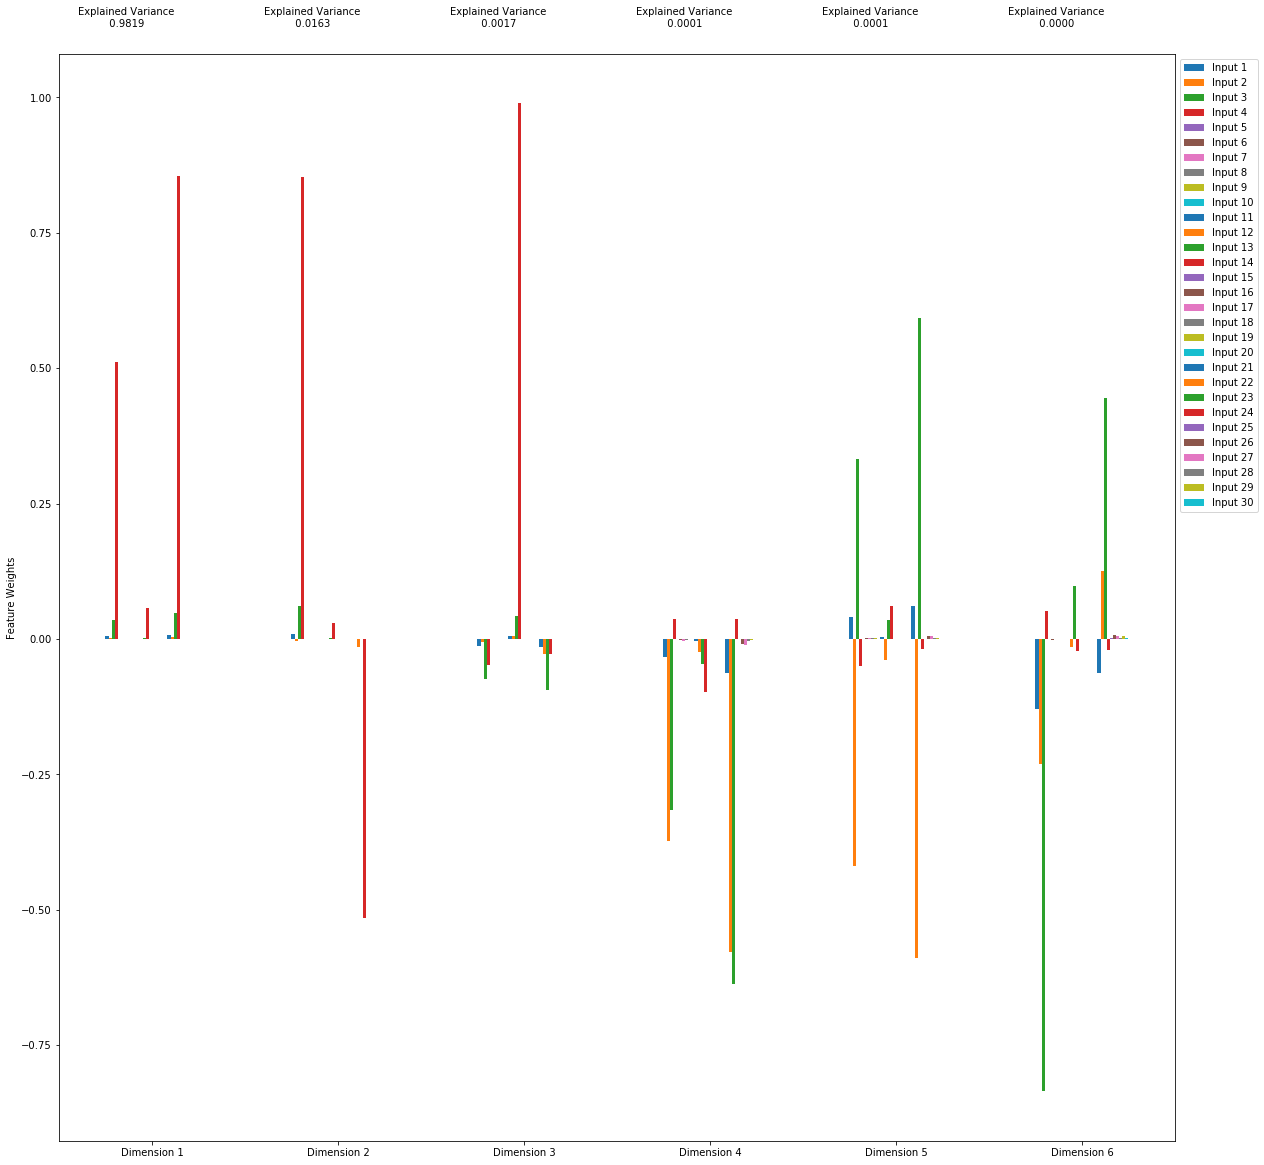

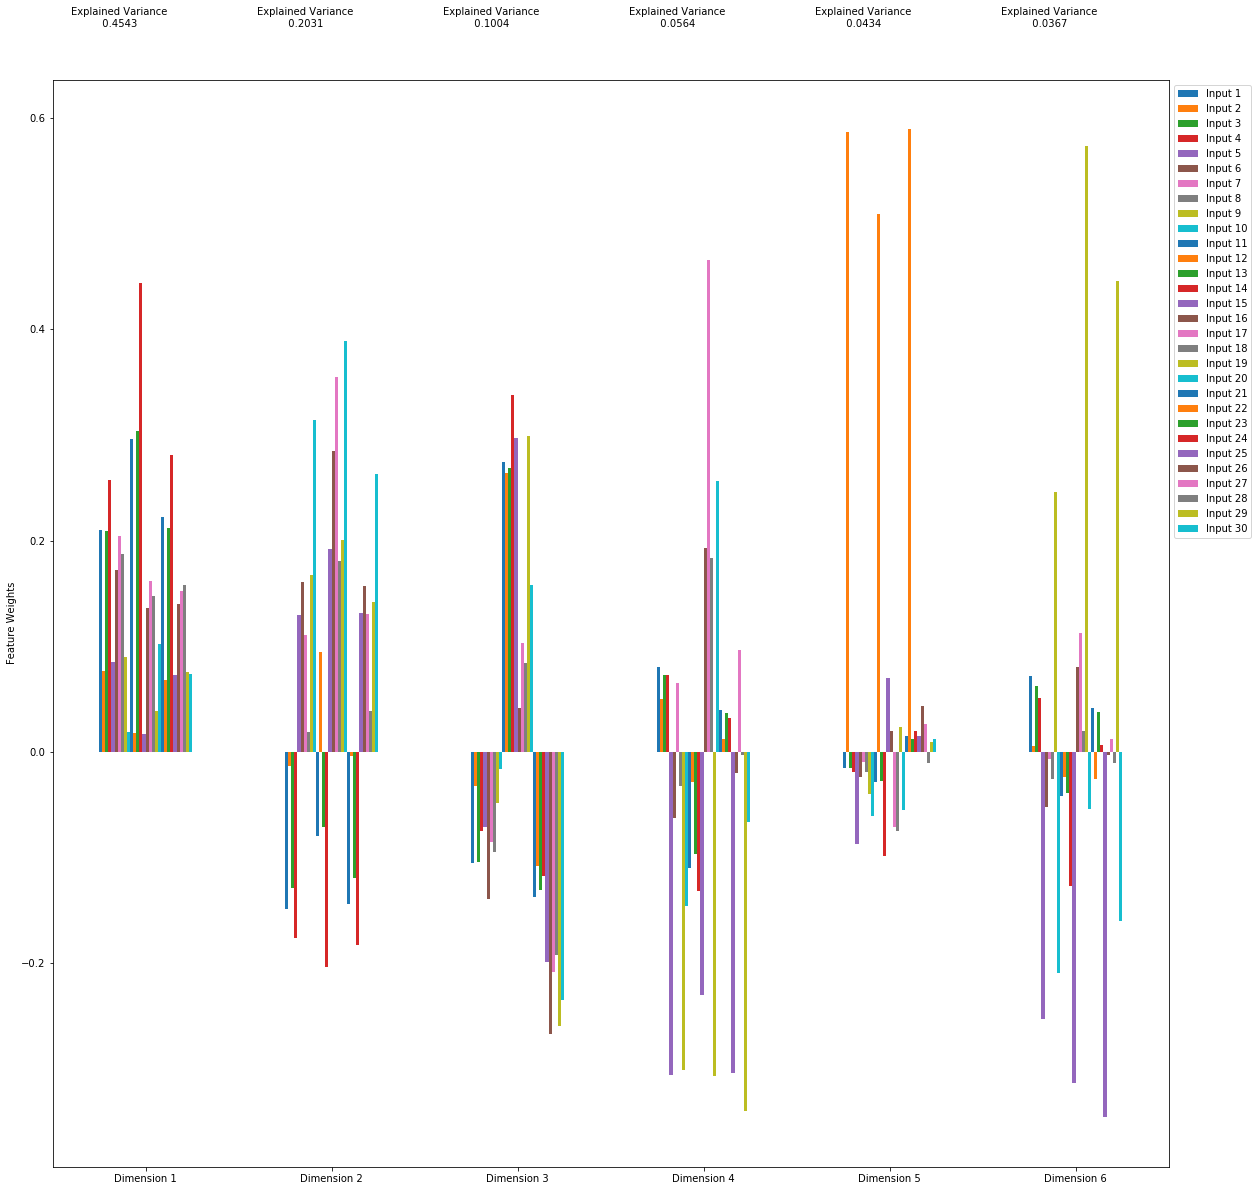

In [24]:
import matplotlib.pyplot as plt
import helper
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

robust = RobustScaler()
robust.fit(X_train)
X_train_scaled = pd.DataFrame(robust.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(robust.transform(X_test), columns = X_test.columns, index = X_test.index)

pca_raw = PCA(n_components = 6)
pca_scaled = PCA(n_components = 6)

pca_raw.fit(X_train)
pca_scaled.fit(X_train_scaled)

helper.pca_hist(X_train, pca_raw, (20,20))
helper.pca_hist(X_train_scaled, pca_scaled, (20,20))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

pca_raw = PCA(n_components = 1)
pca_scaled = PCA(n_components = 4)

pca_raw.fit(X_train)
pca_scaled.fit(X_train_scaled)

#Add below to helper.py eventually?

pca_raw_train = pd.DataFrame(pca_raw.transform(X_train), 
                         columns = ['Dimension {}'.format(i) for i in range(1, len(pca_raw.components_)+1)],
                         index = X_train.index)

pca_raw_test = pd.DataFrame(pca_raw.transform(X_test), 
                         columns = ['Dimension {}'.format(i) for i in range(1, len(pca_raw.components_)+1)],
                         index = X_test.index)

pca_scaled_train = pd.DataFrame(pca_scaled.transform(X_train_scaled), 
                         columns = ['Dimension {}'.format(i) for i in range(1, len(pca_scaled.components_)+1)],
                         index = X_train_scaled.index)

pca_scaled_test = pd.DataFrame(pca_scaled.transform(X_test_scaled), 
                         columns = ['Dimension {}'.format(i) for i in range(1, len(pca_scaled.components_)+1)],
                         index = X_test_scaled.index)


clf_A = LogisticRegression(random_state = seed)
clf_B = LinearSVC(random_state = seed)

models = [clf_A, clf_B]

helper.train_predict(pca_raw_train, pca_raw_test, y_train, y_test, models)
helper.train_predict(pca_scaled_train, pca_scaled_test, y_train, y_test, models)



Results for LogisticRegression:
Accuracy = 0.9211
Confusion matrix:
[[65  2]
 [ 7 40]]
Results for LinearSVC:
Accuracy = 0.9298
Confusion matrix:
[[66  1]
 [ 7 40]]
Results for LogisticRegression:
Accuracy = 0.9298
Confusion matrix:
[[63  4]
 [ 4 43]]
Results for LinearSVC:
Accuracy = 0.9386
Confusion matrix:
[[63  4]
 [ 3 44]]
